In [2]:
from numpy import unique
from numpy import where
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.metrics import silhouette_samples, silhouette_score



In [5]:
# define dataset
df = pd.read_csv("d:/idealabs_Ai/AreaSafetyPrediction.csv")
print(df.head())



   area  sex ratio  r cases  crimes  wine shops  men literacy  porn access  \
0     1        756       44     175          13            71            4   
1     2        850       77     162          10            72            5   
2     3        945       61     158          13            73            7   
3     4        821       69     151          19            75            6   
4     5        946       74     197          18            70            5   

   psych cases  desserted area  ring roads  slum areas  season  time of visit  \
0           33             0.2           2         0.1       4              1   
1           45             0.2           4         0.3       2              2   
2           49             0.1           0         0.2       3              2   
3           30             0.4           7         0.2       1              1   
4           47             0.3           7         0.1       2              1   

   outcome  
0  133.480  
1  147.932  
2  15

In [6]:
#validating the dataset
df.mean()

area                2.93000
sex ratio         876.03000
r cases            60.86000
crimes            175.07000
wine shops         15.27000
men literacy       77.32000
porn access         6.40000
psych cases        44.74000
desserted area      0.29100
ring roads          3.48000
slum areas          0.22200
season              2.53000
time of visit       1.49000
outcome           152.12249
dtype: float64

In [7]:
df1=df[:100]

In [8]:
df1.mean()

area                2.93000
sex ratio         876.03000
r cases            60.86000
crimes            175.07000
wine shops         15.27000
men literacy       77.32000
porn access         6.40000
psych cases        44.74000
desserted area      0.29100
ring roads          3.48000
slum areas          0.22200
season              2.53000
time of visit       1.49000
outcome           152.12249
dtype: float64

In [9]:
df.dtypes

area                int64
sex ratio           int64
r cases             int64
crimes              int64
wine shops          int64
men literacy        int64
porn access         int64
psych cases         int64
desserted area    float64
ring roads          int64
slum areas        float64
season              int64
time of visit       int64
outcome           float64
dtype: object

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'sex ratio'}>,
        <AxesSubplot:title={'center':'r cases'}>,
        <AxesSubplot:title={'center':'crimes'}>],
       [<AxesSubplot:title={'center':'wine shops'}>,
        <AxesSubplot:title={'center':'men literacy'}>,
        <AxesSubplot:title={'center':'porn access'}>,
        <AxesSubplot:title={'center':'psych cases'}>],
       [<AxesSubplot:title={'center':'desserted area'}>,
        <AxesSubplot:title={'center':'ring roads'}>,
        <AxesSubplot:title={'center':'slum areas'}>,
        <AxesSubplot:title={'center':'season'}>],
       [<AxesSubplot:title={'center':'time of visit'}>,
        <AxesSubplot:title={'center':'outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

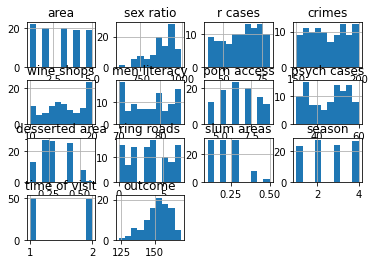

In [10]:
df.hist()

In [11]:
df.isnull()

,area,sex ratio,r cases,crimes,wine shops,men literacy,porn access,psych cases,desserted area,ring roads,slum areas,season,time of visit,outcome
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

area              0
sex ratio         0
r cases           0
crimes            0
wine shops        0
men literacy      0
porn access       0
psych cases       0
desserted area    0
ring roads        0
slum areas        0
season            0
time of visit     0
outcome           0
dtype: int64

<AxesSubplot:>

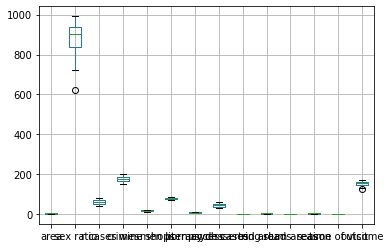

In [13]:
#checking for outliers
df.boxplot()

In [14]:
df.corr()

,area,sex ratio,r cases,crimes,wine shops,men literacy,porn access,psych cases,desserted area,ring roads,slum areas,season,time of visit,outcome
area,1.000000,0.028595,0.035122,0.115211,0.127591,-0.067478,0.012974,0.012547,-0.091468,-0.066497,-0.112793,0.042531,-0.092355,0.057979
sex ratio,0.028595,1.000000,-0.022688,0.139297,-0.062857,-0.123505,0.202015,-0.109448,0.184203,0.057041,-0.011680,-0.109134,0.128510,0.954782
r cases,0.035122,-0.022688,1.000000,0.045849,-0.010233,0.023638,0.020789,-0.067936,0.073704,-0.070923,0.032828,-0.049402,-0.139820,0.118559
crimes,0.115211,0.139297,0.045849,1.000000,-0.009450,0.153619,-0.002185,0.120434,0.121094,0.020721,0.026565,0.006408,-0.075167,0.374389
wine shops,0.127591,-0.062857,-0.010233,-0.009450,1.000000,-0.180727,0.061451,0.104614,-0.001515,-0.018088,-0.058947,-0.029681,-0.027006,-0.051603
men literacy,-0.067478,-0.123505,0.023638,0.153619,-0.180727,1.000000,0.191171,0.001402,0.066774,-0.028451,-0.013803,0.101631,-0.147526,-0.011388
porn access,0.012974,0.202015,0.020789,-0.002185,0.061451,0.191171,1.000000,0.050500,0.140575,-0.147629,0.117026,-0.090404,-0.073865,0.224215
psych cases,0.012547,-0.109448,-0.067936,0.120434,0.104614,0.001402,0.050500,1.000000,-0.089458,-0.020036,-0.057337,0.128189,0.103181,0.002296
desserted area,-0.091468,0.184203,0.073704,0.121094,-0.001515,0.066774,0.140575,-0.089458,1.000000,-0.086234,-0.024525,0.020807,0.190079,0.207610
ring roads,-0.066497,0.057041,-0.070923,0.020721,-0.018088,-0.028451,-0.147629,-0.020036,-0.086234,1.000000,-0.138843,-0.025401,-0.127013,0.061106


In [15]:
df=df.drop(columns=['wine shops','men literacy','slum areas','season'])

In [16]:
df.head()

,area,sex ratio,r cases,crimes,porn access,psych cases,desserted area,ring roads,time of visit,outcome
0,1,756,44,175,4,33,0.2,2,1,133.480
1,2,850,77,162,5,45,0.2,4,2,147.932
2,3,945,61,158,7,49,0.1,0,2,157.539
3,4,821,69,151,6,30,0.4,7,1,141.810
4,5,946,74,197,5,47,0.3,7,1,164.577


In [17]:
df_out=df[['area','outcome']]

In [19]:
# define the model
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
matrix = df_out.to_numpy()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.5625284759880289
For n_clusters = 3 The average silhouette_score is : 0.48844380912001994
For n_clusters = 4 The average silhouette_score is : 0.4997604934718878
For n_clusters = 5 The average silhouette_score is : 0.4839922397598631
For n_clusters = 6 The average silhouette_score is : 0.4518279548681254
For n_clusters = 7 The average silhouette_score is : 0.42785112213806825
For n_clusters = 8 The average silhouette_score is : 0.4048681509927103
For n_clusters = 9 The average silhouette_score is : 0.38341806203787776


In [20]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.563


Text(0, 0.5, 'outcome')

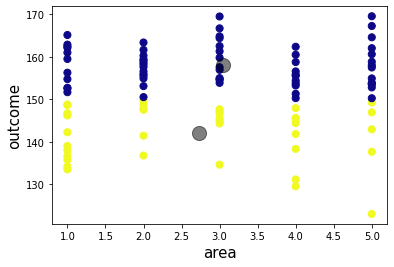

In [24]:
#create a scatter plot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('area', fontsize=15)
plt.ylabel('outcome', fontsize=15)

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [26]:
X = df[['area','outcome']]

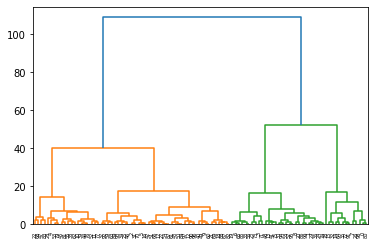

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [33]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [34]:
labels

array([0, 2, 4, 2, 1, 4, 2, 0, 2, 3, 1, 1, 3, 2, 0, 0, 4, 3, 3, 2, 2, 3,
       1, 2, 2, 4, 0, 3, 1, 2, 2, 4, 0, 2, 4, 0, 2, 4, 1, 1, 3, 2, 3, 3,
       1, 1, 4, 1, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 2, 4, 3, 3, 1, 4, 0, 2,
       3, 3, 1, 3, 4, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 3, 1, 3, 2, 2, 3,
       3, 4, 3, 0, 4, 4, 2, 2, 3, 3, 0, 2], dtype=int64)

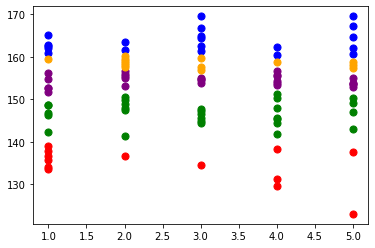

In [39]:
import numpy as np
X = np.array(X)
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()